In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
import cv2 
import os

In [2]:
image_arr = []
mask_arr = []

for root,dirs,files in os.walk("KMCDATAExtracted"):
    path = root.split(os.path.sep)[-1]
    if (path == "img"):
        images = os.listdir(root)
        for i,image_name in enumerate(images):
            if image_name.endswith(".png"):
                image_arr.append(root + "\\" + image_name)
                
                
    elif (path == "mask"):
        images = os.listdir(root)
        for i,image_name in enumerate(images):
            if image_name.endswith(".png"):
                mask_arr.append(root + "\\" + image_name)

In [3]:
print(len(image_arr))
print(len(mask_arr))

6600
6600


In [4]:
image_dataset = []
mask_dataset = []

for i in range(len(image_arr)):
    
    image = cv2.imread(image_arr[i],1)
    mask = cv2.imread(mask_arr[i],1)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    
    if (cv2.countNonZero(gray) == 0):
    
        print("****** Ignoring " + image_arr[i] + "******")
        
    else :
        
        label_img = image_arr[i].split("\\")
        label_mask = mask_arr[i].split("\\")
    
        path_img = "new_data" + "\\" + label_img[1] + "\\" + label_img[2] + "\\" + label_img[3]
        path_mask = "new_data" + "\\" + label_mask[1] + "\\" + label_mask[2] + "\\" + label_mask[3]
        
        #   cropping

        _,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnt = max(contours, key = cv2.contourArea, default = 0)
        x,y,w,h = cv2.boundingRect(cnt)
        
        if w == 0 & h ==0 :
            
            cv2.imwrite(image, path_img)
            cv2.imwrite(mask, path_mask)
            
        else:
            
            crop_img = image[y:y+h,x:x+w]
            crop_mask = mask[y:y+h,x:x+w]
            crop_mask[crop_mask>0]=255

            print(path_img)
            print(path_mask)
            
            crop_img=cv2.resize(crop_img, (256, 256),interpolation = cv2.INTER_LINEAR)
            crop_mask=cv2.resize(crop_mask, (256, 256),interpolation = cv2.INTER_LINEAR)

            cv2.imwrite(path_img, crop_img)
            cv2.imwrite(path_mask, crop_mask)

            crop_img = np.array(crop_img)
            crop_mask = np.array(crop_mask)

            image_dataset.append(crop_img)
            mask_dataset.append(crop_mask)

****** Ignoring KMCDATAExtracted\1\img\1_left_image_00000.png******
new_data\1\img\1_left_image_00001.png
new_data\1\mask\1_left_mask_00001.png
new_data\1\img\1_left_image_00002.png
new_data\1\mask\1_left_mask_00002.png
new_data\1\img\1_left_image_00003.png
new_data\1\mask\1_left_mask_00003.png
new_data\1\img\1_left_image_00004.png
new_data\1\mask\1_left_mask_00004.png
new_data\1\img\1_left_image_00005.png
new_data\1\mask\1_left_mask_00005.png
new_data\1\img\1_left_image_00006.png
new_data\1\mask\1_left_mask_00006.png
new_data\1\img\1_left_image_00007.png
new_data\1\mask\1_left_mask_00007.png
new_data\1\img\1_left_image_00008.png
new_data\1\mask\1_left_mask_00008.png
new_data\1\img\1_left_image_00009.png
new_data\1\mask\1_left_mask_00009.png
new_data\1\img\1_left_image_00010.png
new_data\1\mask\1_left_mask_00010.png
new_data\1\img\1_left_image_00011.png
new_data\1\mask\1_left_mask_00011.png
new_data\1\img\1_left_image_00012.png
new_data\1\mask\1_left_mask_00012.png
new_data\1\img\1_lef

new_data\1\img\1_left_image_00113.png
new_data\1\mask\1_left_mask_00113.png
new_data\1\img\1_left_image_00114.png
new_data\1\mask\1_left_mask_00114.png
new_data\1\img\1_left_image_00115.png
new_data\1\mask\1_left_mask_00115.png
new_data\1\img\1_left_image_00116.png
new_data\1\mask\1_left_mask_00116.png
new_data\1\img\1_left_image_00117.png
new_data\1\mask\1_left_mask_00117.png
new_data\1\img\1_left_image_00118.png
new_data\1\mask\1_left_mask_00118.png
new_data\1\img\1_left_image_00119.png
new_data\1\mask\1_left_mask_00119.png
new_data\1\img\1_left_image_00120.png
new_data\1\mask\1_left_mask_00120.png
new_data\1\img\1_left_image_00121.png
new_data\1\mask\1_left_mask_00121.png
new_data\1\img\1_left_image_00122.png
new_data\1\mask\1_left_mask_00122.png
new_data\1\img\1_left_image_00123.png
new_data\1\mask\1_left_mask_00123.png
new_data\1\img\1_left_image_00124.png
new_data\1\mask\1_left_mask_00124.png
new_data\1\img\1_left_image_00125.png
new_data\1\mask\1_left_mask_00125.png
new_data\1\i

new_data\1\img\1_left_image_00221.png
new_data\1\mask\1_left_mask_00221.png
new_data\1\img\1_left_image_00222.png
new_data\1\mask\1_left_mask_00222.png
new_data\1\img\1_left_image_00223.png
new_data\1\mask\1_left_mask_00223.png
new_data\1\img\1_left_image_00224.png
new_data\1\mask\1_left_mask_00224.png
new_data\1\img\1_left_image_00225.png
new_data\1\mask\1_left_mask_00225.png
new_data\1\img\1_left_image_00226.png
new_data\1\mask\1_left_mask_00226.png
new_data\1\img\1_left_image_00227.png
new_data\1\mask\1_left_mask_00227.png
new_data\1\img\1_left_image_00228.png
new_data\1\mask\1_left_mask_00228.png
new_data\1\img\1_left_image_00229.png
new_data\1\mask\1_left_mask_00229.png
new_data\1\img\1_left_image_00230.png
new_data\1\mask\1_left_mask_00230.png
new_data\1\img\1_left_image_00231.png
new_data\1\mask\1_left_mask_00231.png
new_data\1\img\1_left_image_00232.png
new_data\1\mask\1_left_mask_00232.png
new_data\1\img\1_left_image_00233.png
new_data\1\mask\1_left_mask_00233.png
new_data\1\i

new_data\1\img\1_left_image_00329.png
new_data\1\mask\1_left_mask_00329.png
new_data\1\img\1_left_image_00330.png
new_data\1\mask\1_left_mask_00330.png
new_data\1\img\1_left_image_00331.png
new_data\1\mask\1_left_mask_00331.png
new_data\1\img\1_left_image_00332.png
new_data\1\mask\1_left_mask_00332.png
new_data\1\img\1_left_image_00333.png
new_data\1\mask\1_left_mask_00333.png
new_data\1\img\1_left_image_00334.png
new_data\1\mask\1_left_mask_00334.png
new_data\1\img\1_left_image_00335.png
new_data\1\mask\1_left_mask_00335.png
new_data\1\img\1_left_image_00336.png
new_data\1\mask\1_left_mask_00336.png
new_data\1\img\1_left_image_00337.png
new_data\1\mask\1_left_mask_00337.png
new_data\1\img\1_left_image_00338.png
new_data\1\mask\1_left_mask_00338.png
new_data\1\img\1_left_image_00339.png
new_data\1\mask\1_left_mask_00339.png
new_data\1\img\1_left_image_00340.png
new_data\1\mask\1_left_mask_00340.png
new_data\1\img\1_left_image_00341.png
new_data\1\mask\1_left_mask_00341.png
new_data\1\i

new_data\1\img\1_left_image_00439.png
new_data\1\mask\1_left_mask_00439.png
new_data\1\img\1_left_image_00440.png
new_data\1\mask\1_left_mask_00440.png
new_data\1\img\1_left_image_00441.png
new_data\1\mask\1_left_mask_00441.png
new_data\1\img\1_left_image_00442.png
new_data\1\mask\1_left_mask_00442.png
new_data\1\img\1_left_image_00443.png
new_data\1\mask\1_left_mask_00443.png
new_data\1\img\1_left_image_00444.png
new_data\1\mask\1_left_mask_00444.png
new_data\1\img\1_left_image_00445.png
new_data\1\mask\1_left_mask_00445.png
new_data\1\img\1_left_image_00446.png
new_data\1\mask\1_left_mask_00446.png
new_data\1\img\1_left_image_00447.png
new_data\1\mask\1_left_mask_00447.png
new_data\1\img\1_left_image_00448.png
new_data\1\mask\1_left_mask_00448.png
new_data\1\img\1_left_image_00449.png
new_data\1\mask\1_left_mask_00449.png
new_data\1\img\1_left_image_00450.png
new_data\1\mask\1_left_mask_00450.png
new_data\1\img\1_left_image_00451.png
new_data\1\mask\1_left_mask_00451.png
new_data\1\i

new_data\1\img\1_left_image_00548.png
new_data\1\mask\1_left_mask_00548.png
new_data\1\img\1_left_image_00549.png
new_data\1\mask\1_left_mask_00549.png
new_data\1\img\1_left_image_00550.png
new_data\1\mask\1_left_mask_00550.png
new_data\1\img\1_left_image_00551.png
new_data\1\mask\1_left_mask_00551.png
new_data\1\img\1_left_image_00552.png
new_data\1\mask\1_left_mask_00552.png
new_data\1\img\1_left_image_00553.png
new_data\1\mask\1_left_mask_00553.png
new_data\1\img\1_left_image_00554.png
new_data\1\mask\1_left_mask_00554.png
new_data\1\img\1_left_image_00555.png
new_data\1\mask\1_left_mask_00555.png
new_data\1\img\1_left_image_00556.png
new_data\1\mask\1_left_mask_00556.png
new_data\1\img\1_left_image_00557.png
new_data\1\mask\1_left_mask_00557.png
new_data\1\img\1_left_image_00558.png
new_data\1\mask\1_left_mask_00558.png
new_data\1\img\1_left_image_00559.png
new_data\1\mask\1_left_mask_00559.png
new_data\1\img\1_left_image_00560.png
new_data\1\mask\1_left_mask_00560.png
new_data\1\i

new_data\1\img\1_right_image_00066.png
new_data\1\mask\1_right_mask_00066.png
new_data\1\img\1_right_image_00067.png
new_data\1\mask\1_right_mask_00067.png
new_data\1\img\1_right_image_00068.png
new_data\1\mask\1_right_mask_00068.png
new_data\1\img\1_right_image_00069.png
new_data\1\mask\1_right_mask_00069.png
new_data\1\img\1_right_image_00070.png
new_data\1\mask\1_right_mask_00070.png
new_data\1\img\1_right_image_00071.png
new_data\1\mask\1_right_mask_00071.png
new_data\1\img\1_right_image_00072.png
new_data\1\mask\1_right_mask_00072.png
new_data\1\img\1_right_image_00073.png
new_data\1\mask\1_right_mask_00073.png
new_data\1\img\1_right_image_00074.png
new_data\1\mask\1_right_mask_00074.png
new_data\1\img\1_right_image_00075.png
new_data\1\mask\1_right_mask_00075.png
new_data\1\img\1_right_image_00076.png
new_data\1\mask\1_right_mask_00076.png
new_data\1\img\1_right_image_00077.png
new_data\1\mask\1_right_mask_00077.png
new_data\1\img\1_right_image_00078.png
new_data\1\mask\1_right_m

new_data\1\img\1_right_image_00187.png
new_data\1\mask\1_right_mask_00187.png
new_data\1\img\1_right_image_00188.png
new_data\1\mask\1_right_mask_00188.png
new_data\1\img\1_right_image_00189.png
new_data\1\mask\1_right_mask_00189.png
new_data\1\img\1_right_image_00190.png
new_data\1\mask\1_right_mask_00190.png
new_data\1\img\1_right_image_00191.png
new_data\1\mask\1_right_mask_00191.png
new_data\1\img\1_right_image_00192.png
new_data\1\mask\1_right_mask_00192.png
new_data\1\img\1_right_image_00193.png
new_data\1\mask\1_right_mask_00193.png
new_data\1\img\1_right_image_00194.png
new_data\1\mask\1_right_mask_00194.png
new_data\1\img\1_right_image_00195.png
new_data\1\mask\1_right_mask_00195.png
new_data\1\img\1_right_image_00196.png
new_data\1\mask\1_right_mask_00196.png
new_data\1\img\1_right_image_00197.png
new_data\1\mask\1_right_mask_00197.png
new_data\1\img\1_right_image_00198.png
new_data\1\mask\1_right_mask_00198.png
new_data\1\img\1_right_image_00199.png
new_data\1\mask\1_right_m

new_data\1\img\1_right_image_00306.png
new_data\1\mask\1_right_mask_00306.png
new_data\1\img\1_right_image_00307.png
new_data\1\mask\1_right_mask_00307.png
new_data\1\img\1_right_image_00308.png
new_data\1\mask\1_right_mask_00308.png
new_data\1\img\1_right_image_00309.png
new_data\1\mask\1_right_mask_00309.png
new_data\1\img\1_right_image_00310.png
new_data\1\mask\1_right_mask_00310.png
new_data\1\img\1_right_image_00311.png
new_data\1\mask\1_right_mask_00311.png
new_data\1\img\1_right_image_00312.png
new_data\1\mask\1_right_mask_00312.png
new_data\1\img\1_right_image_00313.png
new_data\1\mask\1_right_mask_00313.png
new_data\1\img\1_right_image_00314.png
new_data\1\mask\1_right_mask_00314.png
new_data\1\img\1_right_image_00315.png
new_data\1\mask\1_right_mask_00315.png
new_data\1\img\1_right_image_00316.png
new_data\1\mask\1_right_mask_00316.png
new_data\1\img\1_right_image_00317.png
new_data\1\mask\1_right_mask_00317.png
new_data\1\img\1_right_image_00318.png
new_data\1\mask\1_right_m

new_data\1\img\1_right_image_00427.png
new_data\1\mask\1_right_mask_00427.png
new_data\1\img\1_right_image_00428.png
new_data\1\mask\1_right_mask_00428.png
new_data\1\img\1_right_image_00429.png
new_data\1\mask\1_right_mask_00429.png
new_data\1\img\1_right_image_00430.png
new_data\1\mask\1_right_mask_00430.png
new_data\1\img\1_right_image_00431.png
new_data\1\mask\1_right_mask_00431.png
new_data\1\img\1_right_image_00432.png
new_data\1\mask\1_right_mask_00432.png
new_data\1\img\1_right_image_00433.png
new_data\1\mask\1_right_mask_00433.png
new_data\1\img\1_right_image_00434.png
new_data\1\mask\1_right_mask_00434.png
new_data\1\img\1_right_image_00435.png
new_data\1\mask\1_right_mask_00435.png
new_data\1\img\1_right_image_00436.png
new_data\1\mask\1_right_mask_00436.png
new_data\1\img\1_right_image_00437.png
new_data\1\mask\1_right_mask_00437.png
new_data\1\img\1_right_image_00438.png
new_data\1\mask\1_right_mask_00438.png
new_data\1\img\1_right_image_00439.png
new_data\1\mask\1_right_m

new_data\1\img\1_right_image_00533.png
new_data\1\mask\1_right_mask_00533.png
new_data\1\img\1_right_image_00534.png
new_data\1\mask\1_right_mask_00534.png
new_data\1\img\1_right_image_00535.png
new_data\1\mask\1_right_mask_00535.png
new_data\1\img\1_right_image_00536.png
new_data\1\mask\1_right_mask_00536.png
new_data\1\img\1_right_image_00537.png
new_data\1\mask\1_right_mask_00537.png
new_data\1\img\1_right_image_00538.png
new_data\1\mask\1_right_mask_00538.png
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00539.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00540.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00541.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00542.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00543.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00544.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00545.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_im

new_data\2\img\2_left_image_00060.png
new_data\2\mask\2_left_mask_00060.png
new_data\2\img\2_left_image_00061.png
new_data\2\mask\2_left_mask_00061.png
new_data\2\img\2_left_image_00062.png
new_data\2\mask\2_left_mask_00062.png
new_data\2\img\2_left_image_00063.png
new_data\2\mask\2_left_mask_00063.png
new_data\2\img\2_left_image_00064.png
new_data\2\mask\2_left_mask_00064.png
new_data\2\img\2_left_image_00065.png
new_data\2\mask\2_left_mask_00065.png
new_data\2\img\2_left_image_00066.png
new_data\2\mask\2_left_mask_00066.png
new_data\2\img\2_left_image_00067.png
new_data\2\mask\2_left_mask_00067.png
new_data\2\img\2_left_image_00068.png
new_data\2\mask\2_left_mask_00068.png
new_data\2\img\2_left_image_00069.png
new_data\2\mask\2_left_mask_00069.png
new_data\2\img\2_left_image_00070.png
new_data\2\mask\2_left_mask_00070.png
new_data\2\img\2_left_image_00071.png
new_data\2\mask\2_left_mask_00071.png
new_data\2\img\2_left_image_00072.png
new_data\2\mask\2_left_mask_00072.png
new_data\2\i

new_data\2\img\2_left_image_00168.png
new_data\2\mask\2_left_mask_00168.png
new_data\2\img\2_left_image_00169.png
new_data\2\mask\2_left_mask_00169.png
new_data\2\img\2_left_image_00170.png
new_data\2\mask\2_left_mask_00170.png
new_data\2\img\2_left_image_00171.png
new_data\2\mask\2_left_mask_00171.png
new_data\2\img\2_left_image_00172.png
new_data\2\mask\2_left_mask_00172.png
new_data\2\img\2_left_image_00173.png
new_data\2\mask\2_left_mask_00173.png
new_data\2\img\2_left_image_00174.png
new_data\2\mask\2_left_mask_00174.png
new_data\2\img\2_left_image_00175.png
new_data\2\mask\2_left_mask_00175.png
new_data\2\img\2_left_image_00176.png
new_data\2\mask\2_left_mask_00176.png
new_data\2\img\2_left_image_00177.png
new_data\2\mask\2_left_mask_00177.png
new_data\2\img\2_left_image_00178.png
new_data\2\mask\2_left_mask_00178.png
new_data\2\img\2_left_image_00179.png
new_data\2\mask\2_left_mask_00179.png
new_data\2\img\2_left_image_00180.png
new_data\2\mask\2_left_mask_00180.png
new_data\2\i

new_data\2\img\2_left_image_00277.png
new_data\2\mask\2_left_mask_00277.png
new_data\2\img\2_left_image_00278.png
new_data\2\mask\2_left_mask_00278.png
new_data\2\img\2_left_image_00279.png
new_data\2\mask\2_left_mask_00279.png
new_data\2\img\2_left_image_00280.png
new_data\2\mask\2_left_mask_00280.png
new_data\2\img\2_left_image_00281.png
new_data\2\mask\2_left_mask_00281.png
new_data\2\img\2_left_image_00282.png
new_data\2\mask\2_left_mask_00282.png
new_data\2\img\2_left_image_00283.png
new_data\2\mask\2_left_mask_00283.png
new_data\2\img\2_left_image_00284.png
new_data\2\mask\2_left_mask_00284.png
new_data\2\img\2_left_image_00285.png
new_data\2\mask\2_left_mask_00285.png
new_data\2\img\2_left_image_00286.png
new_data\2\mask\2_left_mask_00286.png
new_data\2\img\2_left_image_00287.png
new_data\2\mask\2_left_mask_00287.png
new_data\2\img\2_left_image_00288.png
new_data\2\mask\2_left_mask_00288.png
new_data\2\img\2_left_image_00289.png
new_data\2\mask\2_left_mask_00289.png
new_data\2\i

new_data\2\img\2_left_image_00387.png
new_data\2\mask\2_left_mask_00387.png
new_data\2\img\2_left_image_00388.png
new_data\2\mask\2_left_mask_00388.png
new_data\2\img\2_left_image_00389.png
new_data\2\mask\2_left_mask_00389.png
new_data\2\img\2_left_image_00390.png
new_data\2\mask\2_left_mask_00390.png
new_data\2\img\2_left_image_00391.png
new_data\2\mask\2_left_mask_00391.png
new_data\2\img\2_left_image_00392.png
new_data\2\mask\2_left_mask_00392.png
new_data\2\img\2_left_image_00393.png
new_data\2\mask\2_left_mask_00393.png
new_data\2\img\2_left_image_00394.png
new_data\2\mask\2_left_mask_00394.png
new_data\2\img\2_left_image_00395.png
new_data\2\mask\2_left_mask_00395.png
new_data\2\img\2_left_image_00396.png
new_data\2\mask\2_left_mask_00396.png
new_data\2\img\2_left_image_00397.png
new_data\2\mask\2_left_mask_00397.png
new_data\2\img\2_left_image_00398.png
new_data\2\mask\2_left_mask_00398.png
new_data\2\img\2_left_image_00399.png
new_data\2\mask\2_left_mask_00399.png
new_data\2\i

new_data\2\img\2_left_image_00495.png
new_data\2\mask\2_left_mask_00495.png
new_data\2\img\2_left_image_00496.png
new_data\2\mask\2_left_mask_00496.png
new_data\2\img\2_left_image_00497.png
new_data\2\mask\2_left_mask_00497.png
new_data\2\img\2_left_image_00498.png
new_data\2\mask\2_left_mask_00498.png
new_data\2\img\2_left_image_00499.png
new_data\2\mask\2_left_mask_00499.png
new_data\2\img\2_left_image_00500.png
new_data\2\mask\2_left_mask_00500.png
new_data\2\img\2_left_image_00501.png
new_data\2\mask\2_left_mask_00501.png
new_data\2\img\2_left_image_00502.png
new_data\2\mask\2_left_mask_00502.png
new_data\2\img\2_left_image_00503.png
new_data\2\mask\2_left_mask_00503.png
new_data\2\img\2_left_image_00504.png
new_data\2\mask\2_left_mask_00504.png
new_data\2\img\2_left_image_00505.png
new_data\2\mask\2_left_mask_00505.png
new_data\2\img\2_left_image_00506.png
new_data\2\mask\2_left_mask_00506.png
new_data\2\img\2_left_image_00507.png
new_data\2\mask\2_left_mask_00507.png
new_data\2\i

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:874: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::pointSetBoundingRect'


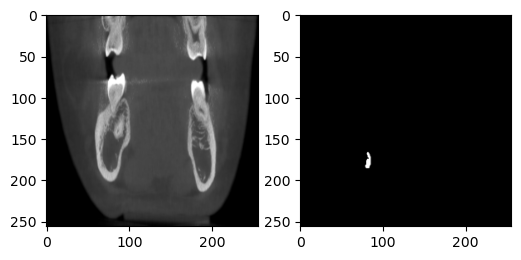

In [5]:
import matplotlib.image as mpimg 
import random
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()

# Labels


In [6]:
mask = "#FFFFFF"
mask = mask.lstrip("#")
mask = np.array(tuple(int(mask[i:i+2], 16) for i in (0, 2, 4)))

unlabeled = "#000000"
unlabeled = unlabeled.lstrip("#")
unlabeled = np.array(tuple(int(unlabeled[i:i+2], 16) for i in (0,2,4)))

In [7]:
print(unlabeled)
print(mask)

[0 0 0]
[255 255 255]


In [8]:
mask_dataset = np.array(mask_dataset, dtype = object)
image_dataset = np.array(image_dataset, dtype = object)

In [9]:
print(mask_dataset.shape)
print(image_dataset.shape)

(1554, 256, 256, 3)
(1554, 256, 256, 3)


In [10]:
def convert_labels(label):
    label_new = np.zeros(label.shape,dtype=np.uint8)
    label_new [np.all(label == mask,axis=-1)] = 1
    label_new [np.all(label==unlabeled,axis=-1)] = 0
   
    label_new = label_new[:,:,0]
    
    return label_new    

labels = []
for i in range(0, mask_dataset.shape[0]):
    label = convert_labels(mask_dataset[i])
    labels.append(label)
    
labels = np.array(labels).astype(np.int32)
labels = np.expand_dims(labels, axis = 3)

In [37]:
no_classes = len(np.unique(labels))
print(no_classes)
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, no_classes)

2


In [38]:
labels.shape

(1554, 256, 256, 2)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(image_dataset, labels, test_size = 0.2, random_state = 0)

In [40]:
X_train = np.array(X_train).astype(np.int32)
X_test = np.array(X_test).astype(np.int32)
Y_train = np.array(Y_train).astype(np.int32)
Y_test = np.array(Y_test).astype(np.int32)

In [41]:
X_train.shape

(1243, 256, 256, 3)

In [42]:
X_test.shape

(311, 256, 256, 3)

In [43]:
Y_train.shape

(1243, 256, 256, 2)

In [44]:
Y_test.shape

(311, 256, 256, 2)

In [45]:
print(np.unique(labels))

[0. 1.]


In [46]:
from tensorflow.keras.models import Model
def unet_model (n_classes = 2, height = 256, width = 256, channels = 3):
    
    input = Input((height, width, channels))

    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(input)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_1)
    pool_1 = MaxPool2D((2,2))(conv_1)
                  
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_1)
    conv_2 = Dropout(0.2)(conv_2)
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_2)
    pool_2 = MaxPool2D((2,2))(conv_2)
                  
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_2)
    conv_3 = Dropout(0.2)(conv_3)
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_3)
    pool_3 = MaxPool2D((2,2))(conv_3)
                  
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_3)
    conv_4 = Dropout(0.2)(conv_4)
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer= "he_normal", padding = "same")(conv_4)
    pool_4 = MaxPool2D((2,2))(conv_4)              
    
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_4)
    conv_5 = Dropout(0.2)(conv_5)
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_5)
     
    conv_6 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(conv_5)
    conv_6 = concatenate([conv_6, conv_4])
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
    conv_6 = Dropout(0.2)(conv_6)
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
                  
    conv_7 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(conv_6)
    conv_7 = concatenate([conv_7, conv_3])
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
    conv_7 = Dropout(0.2)(conv_7)
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
                  
    conv_8 = Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(conv_7)
    conv_8 = concatenate([conv_8, conv_2])
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
    conv_8 = Dropout(0.2)(conv_8)
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
                  
    conv_9 = Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(conv_8)
    conv_9 = concatenate([conv_9, conv_1], axis = 3)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
    conv_9 = Dropout(0.2)(conv_9)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
                  
    output = Conv2D(no_classes, (1,1), activation = "softmax")(conv_9)
                  
    model = Model(inputs = [input], outputs = [output])
                  
    return model

In [47]:
img_height = X_train.shape[1]
img_width = X_train.shape[2]
img_channels = X_train.shape[3]

def get_model ():
    return unet_model(n_classes= no_classes, height= img_height, width=img_width, channels=img_channels)

In [50]:
model = get_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_95 (Conv2D)             (None, 256, 256, 16  448         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_45 (Dropout)           (None, 256, 256, 16  0           ['conv2d_95[0][0]']              
                                )                                                           

                                                                                                  
 conv2d_109 (Conv2D)            (None, 128, 128, 32  18464       ['concatenate_22[0][0]']         
                                )                                                                 
                                                                                                  
 dropout_52 (Dropout)           (None, 128, 128, 32  0           ['conv2d_109[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_110 (Conv2D)            (None, 128, 128, 32  9248        ['dropout_52[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_tr

In [52]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, Y_train, 
                    batch_size = 64,
                    callbacks=[early_stop],
                    verbose=1, 
                    epochs=5, 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

Epoch 1/5
20/20 [==============================] - 302s 15s/step - loss: 0.0174 - accuracy: 0.9996 - val_loss: 0.0107 - val_accuracy: 0.9998
Epoch 2/5
20/20 [==============================] - 312s 15s/step - loss: 0.0157 - accuracy: 0.9995 - val_loss: 0.0114 - val_accuracy: 0.9998
Epoch 3/5
20/20 [==============================] - 313s 16s/step - loss: 0.0124 - accuracy: 0.9995 - val_loss: 0.0079 - val_accuracy: 0.9997
Epoch 4/5
20/20 [==============================] - 317s 16s/step - loss: 0.0171 - accuracy: 0.9993 - val_loss: 0.0133 - val_accuracy: 0.9998
Epoch 5/5
20/20 [==============================] - 313s 16s/step - loss: 0.0123 - accuracy: 0.9996 - val_loss: 0.0132 - val_accuracy: 0.9998


In [58]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 15s 1s/step


In [59]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [62]:
print(Y_pred)

[1.0000000e+00 3.2451000e-09 1.0000000e+00 ... 6.8709976e-03 9.7045016e-01
 2.9549809e-02]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(labels, labels_pred).ravel()
(tn, fp, fn, tp)

In [ ]:
sensitivity = tp/(tp+fn)*100
specificity = tn/(tn+fp)*100
print("Sensitivity : {}".format(sensitivity))
print("Specificity : {}".format(specificity))